# IMPORT PACKAGES

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD ODDS DATASET

In [24]:
odds_df = pd.read_csv("data/odds_2010_to_2025.csv")

odds_df.head()

,Team 1,Team 2,Odds 1,Odds 2,Year
0,Royal Challengers Bengaluru,Punjab Kings,1.90,1.91,2025
1,Mumbai Indians,Punjab Kings,1.68,2.20,2025
2,Gujarat Titans,Mumbai Indians,2.31,1.62,2025
3,Punjab Kings,Royal Challengers Bengaluru,1.97,1.84,2025
4,Lucknow Super Giants,Royal Challengers Bengaluru,2.23,1.66,2025


In [25]:
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team 1  1052 non-null   object 
 1   Team 2  1052 non-null   object 
 2   Odds 1  1052 non-null   float64
 3   Odds 2  1052 non-null   float64
 4   Year    1052 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 41.2+ KB


In [26]:
odds_df.describe()

,Odds 1,Odds 2,Year
count,1052.000000,1052.000000,1052.000000
mean,1.889439,1.973175,2017.624525
std,0.308024,0.304094,4.727059
min,1.250000,1.360000,2010.000000
25%,1.670000,1.737500,2013.000000
50%,1.835000,1.945000,2018.000000
75%,2.062500,2.170000,2022.000000
max,6.240000,3.750000,2025.000000


# YEARLY DISTRIBUTION OF ODDS 1 AND ODDS 2 (2010-2025)

/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_2907/1064159781.py:29: UserWarning:

The figure layout has changed to tight



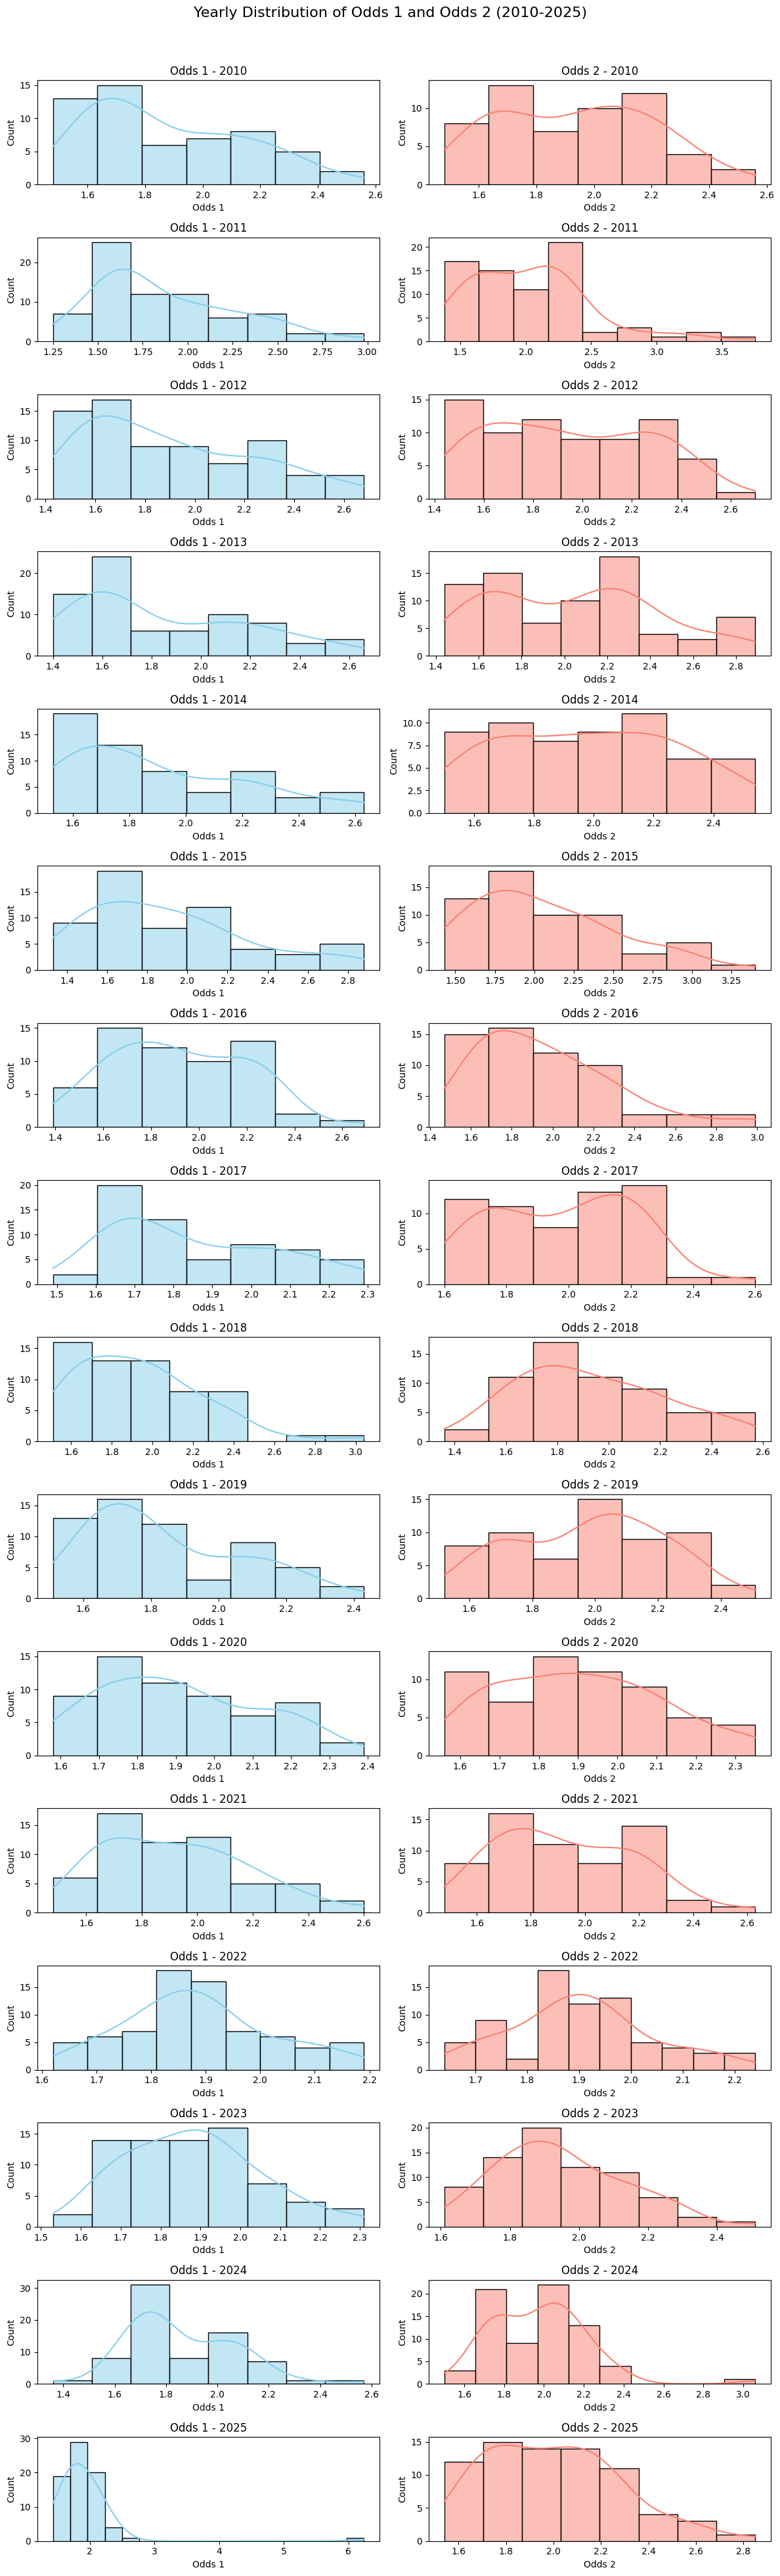

In [27]:
# Ensure numeric types for odds columns
odds_df["Odds 1"] = pd.to_numeric(odds_df["Odds 1"], errors="coerce")
odds_df["Odds 2"] = pd.to_numeric(odds_df["Odds 2"], errors="coerce")

# Drop rows with missing values
odds_df = odds_df.dropna(subset=["Odds 1", "Odds 2", "Year"])

# Get sorted list of years
years = sorted(odds_df["Year"].unique())

# Set up subplots
fig, axes = plt.subplots(len(years), 2, figsize=(12, len(years) * 2.5), constrained_layout=True)
fig.suptitle("Yearly Distribution of Odds 1 and Odds 2 (2010-2025)", fontsize=16)

# Plot distributions
for i, year in enumerate(years):
    year_data = odds_df[odds_df["Year"] == year]
    
    # Odds 1
    sns.histplot(year_data["Odds 1"], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"Odds 1 - {year}")
    axes[i, 0].set_xlabel("Odds 1")
    
    # Odds 2
    sns.histplot(year_data["Odds 2"], kde=True, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f"Odds 2 - {year}")
    axes[i, 1].set_xlabel("Odds 2")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Distribution Check for Odds 1 & Odds 2 (Year-on-Year)

I looked at how **Odds 1** and **Odds 2** changed from year to year to see if they follow a normal distribution. After inspecting them, it turned out they're **a bit right-skewed**, which means there are a few higher outlier values pulling the shape to the right.

# CHECKING FOR OUTLIERS

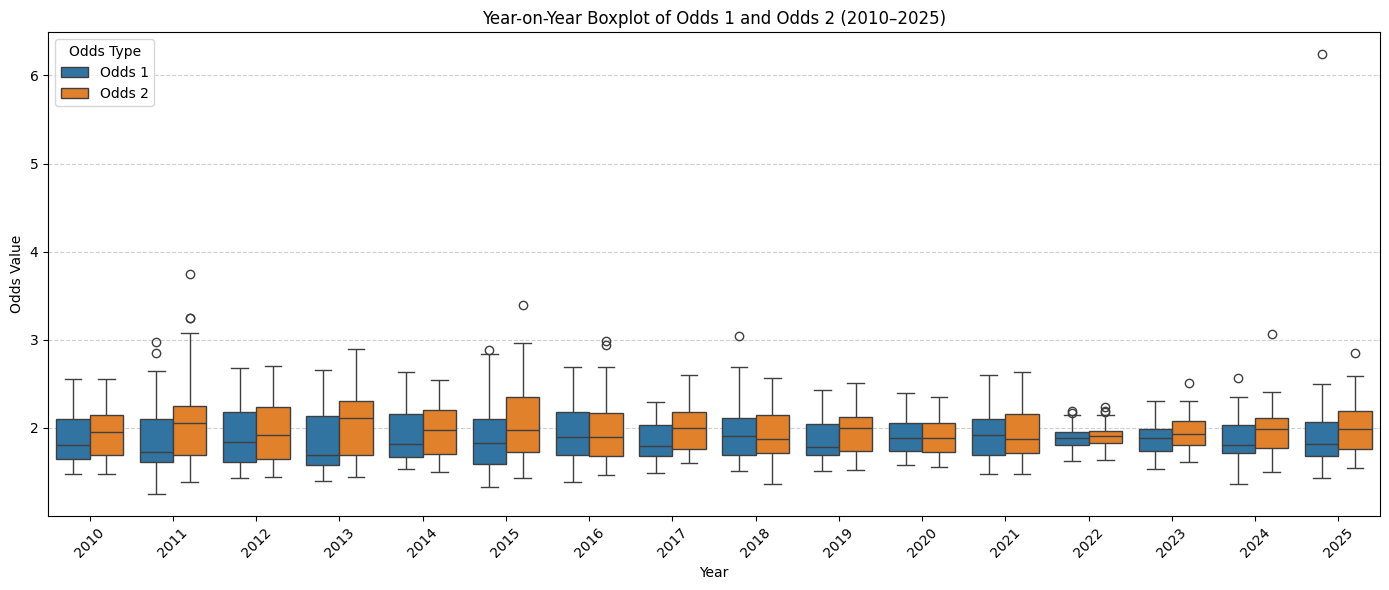

In [28]:

# Reshape the DataFrame for easier plotting with seaborn
melted_df = odds_df.melt(id_vars="Year", value_vars=["Odds 1", "Odds 2"],
                         var_name="Odds Type", value_name="Odds Value")

# Set up the figure
plt.figure(figsize=(14, 6))
sns.boxplot(x="Year", y="Odds Value", hue="Odds Type", data=melted_df)

# Customize the plot
plt.title("Year-on-Year Boxplot of Odds 1 and Odds 2 (2010–2025)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Outlier Detection & Insight from Boxplots

I used boxplots to check for outliers in the **Odds 1** and **Odds 2** distributions, and only found a few extreme values. Normally, implied probabilities imply a strong negative correlation—if one odd is high, the other should proportionally be low—but that didn't happen here.

After diving deeper, I discovered that bookmakers sometimes **inflate odds in a few specific matches**, breaking the implied probability rule. Since these cases are rare and distort the statistical assumptions, I decided to **remove those outliers** to improve the analysis.

# YEARLY DISTRIBUTION OF ODDS 1 AND ODDS 2 (2010-2025) AFTER REMOVING OUTLIERS 

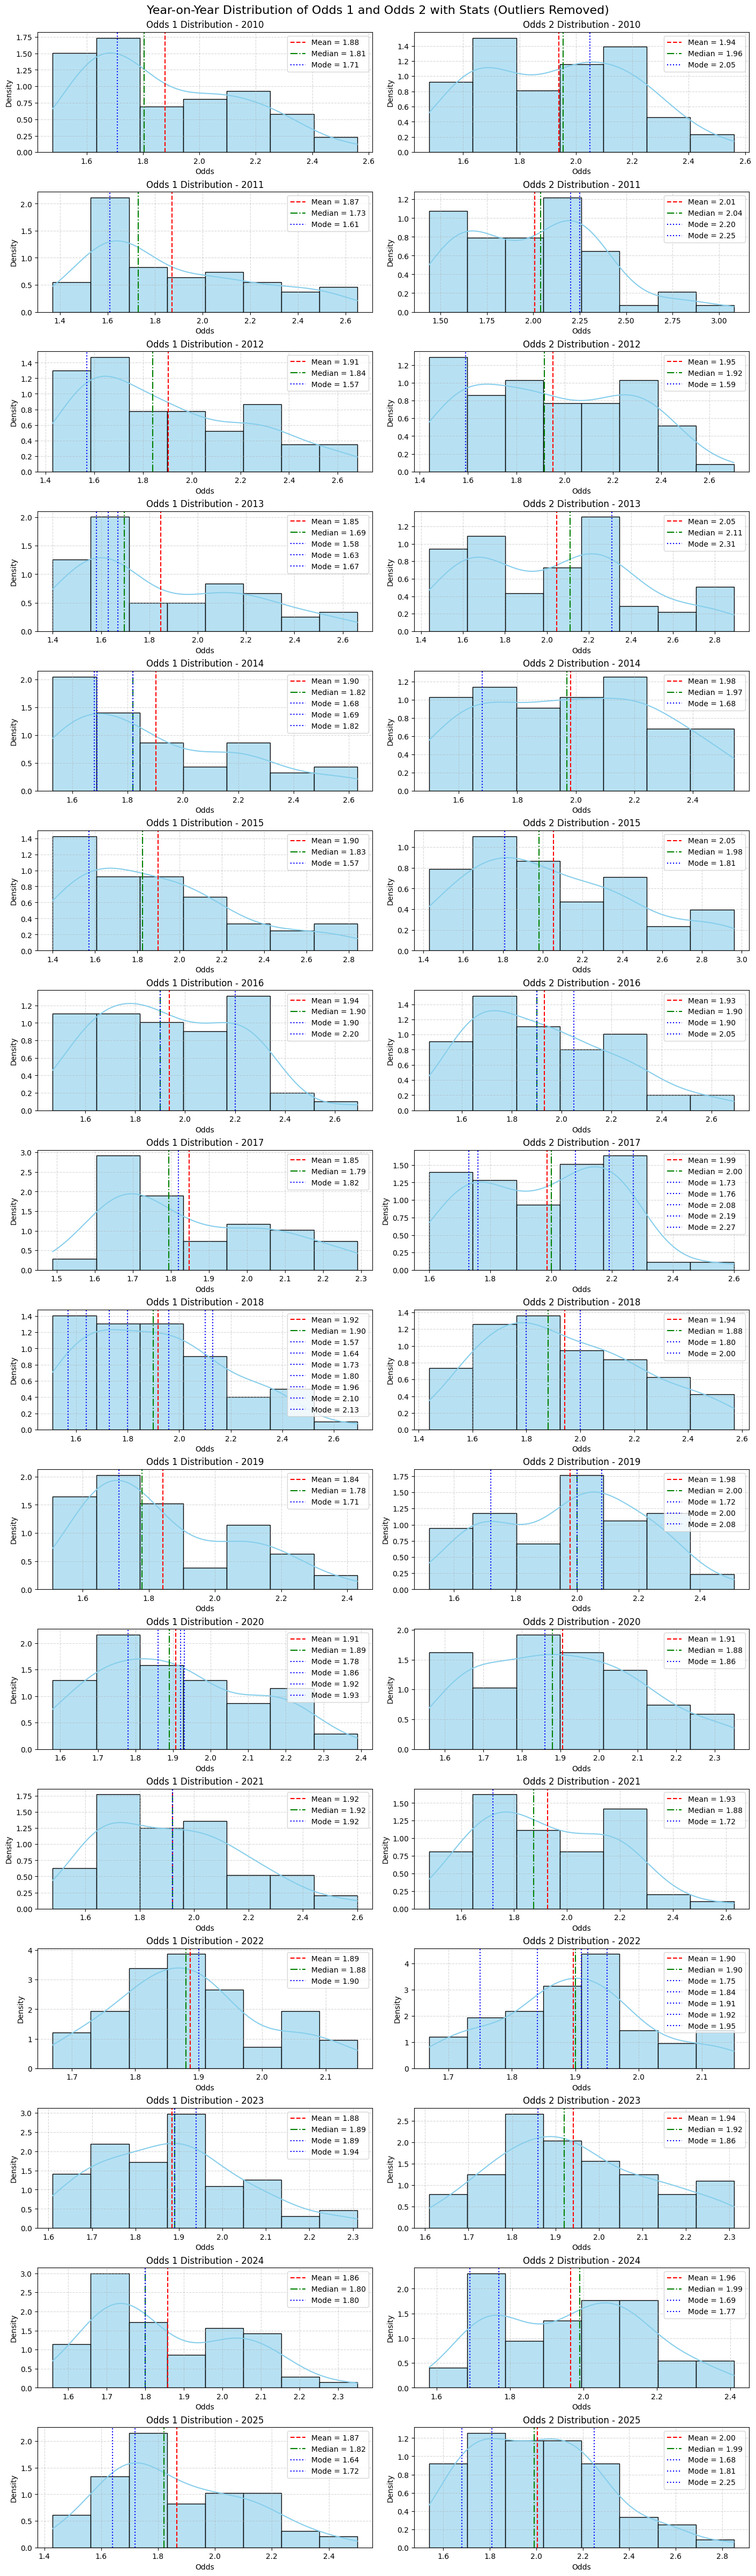

,Year,Odds Type,Mean,Median,Std Dev,Skewness,Kurtosis,Modes
0,2010,Odds 1,1.88,1.81,0.27,0.59,-0.69,[1.71]
1,2010,Odds 2,1.94,1.96,0.27,0.16,-0.95,[2.05]
2,2011,Odds 1,1.87,1.73,0.34,0.65,-0.74,[1.61]
3,2011,Odds 2,2.01,2.04,0.37,0.48,-0.16,"[2.2, 2.25]"
4,2012,Odds 1,1.91,1.84,0.33,0.63,-0.73,[1.57]
5,2012,Odds 2,1.95,1.92,0.33,0.19,-1.12,[1.59]
6,2013,Odds 1,1.85,1.69,0.34,0.61,-0.80,"[1.58, 1.63, 1.67]"
7,2013,Odds 2,2.05,2.11,0.39,0.31,-0.85,[2.31]
8,2014,Odds 1,1.90,1.82,0.31,0.75,-0.47,"[1.68, 1.69, 1.82]"
9,2014,Odds 2,1.98,1.97,0.30,0.08,-1.10,[1.68]


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# --- Step 1: Outlier removal function using IQR ---
def remove_outliers_iqr(df, column):
    cleaned = pd.DataFrame()
    for year in df["Year"].unique():
        year_data = df[df["Year"] == year]
        Q1 = year_data[column].quantile(0.25)
        Q3 = year_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered = year_data[(year_data[column] >= lower_bound) & (year_data[column] <= upper_bound)]
        cleaned = pd.concat([cleaned, filtered], axis=0)
    return cleaned

# --- Step 2: Remove outliers from both Odds 1 and Odds 2 ---
cleaned_odds_df = remove_outliers_iqr(odds_df, "Odds 1")
cleaned_odds_df = remove_outliers_iqr(cleaned_odds_df, "Odds 2")  # filter again for Odds 2

# --- Step 3: Plotting function with stats ---
def plot_distribution_with_stats(data, year, column, ax):
    odds = data[column]
    mean = odds.mean()
    median = odds.median()
    std = odds.std()
    skw = skew(odds)
    kurt = kurtosis(odds)
    modes = odds.mode().tolist()

    # Plot
    sns.histplot(odds, kde=True, ax=ax, color='skyblue', stat='density', edgecolor='black', alpha=0.6)
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
    ax.axvline(median, color='green', linestyle='-.', label=f'Median = {median:.2f}')
    for m in modes:
        ax.axvline(m, color='blue', linestyle=':', label=f'Mode = {m:.2f}')
    
    ax.set_title(f"{column} Distribution - {year}")
    ax.set_xlabel("Odds")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    return {
        "Year": year,
        "Odds Type": column,
        "Mean": round(mean, 2),
        "Median": round(median, 2),
        "Std Dev": round(std, 2),
        "Skewness": round(skw, 2),
        "Kurtosis": round(kurt, 2),
        "Modes": [round(m, 2) for m in modes]
    }

# --- Step 4: Generate plots and stats ---
years = sorted(cleaned_odds_df["Year"].unique())
fig, axes = plt.subplots(len(years), 2, figsize=(14, len(years) * 3), constrained_layout=True)

stats_summary = []
for i, year in enumerate(years):
    data_year = cleaned_odds_df[cleaned_odds_df["Year"] == year]
    stats_summary.append(plot_distribution_with_stats(data_year, year, "Odds 1", axes[i, 0]))
    stats_summary.append(plot_distribution_with_stats(data_year, year, "Odds 2", axes[i, 1]))

plt.suptitle("Year-on-Year Distribution of Odds 1 and Odds 2 with Stats (Outliers Removed)", fontsize=16)
plt.show()

# --- Step 5: Create and display stats summary ---
stats_df = pd.DataFrame(stats_summary)
display(stats_df)

# cleaned dataframe as output
cleaned_odds_df.reset_index(drop=True, inplace=True)

## 🔍 Distribution Analysis After Outlier Removal

After removing the outliers, I re-checked the year-on-year distribution of **Odds 1** and **Odds 2**, and they now appear much closer to a normal distribution—with reduced skewness and improved symmetry.

I also created a new DataFrame called `stats_df`, where I stored the **mean**, **median**, **mode**, **standard deviation**, **skewness**, and **kurtosis** for **Odds 1** and **Odds 2** across each year. This will be useful for any future trend analysis.

# TRENDS OF MEAN , MEDAIN , AND STD DEV ( ODDS 1 AND ODDS 2)

In [30]:
import plotly.graph_objects as go

# stats_agg is created
stats_agg = stats_df.pivot(index='Year', columns='Odds Type')

# Define metrics
metrics = ["Mean", "Median", "Std Dev"]
titles = {
    "Mean": "Year-on-Year Mean (Odds 1 vs Odds 2)",
    "Median": "Year-on-Year Median (Odds 1 vs Odds 2)",
    "Std Dev": "Year-on-Year Standard Deviation (Odds 1 vs Odds 2)"
}

# Create subplots
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=[titles[m] for m in metrics])

for i, metric in enumerate(metrics):
    fig.add_trace(go.Scatter(
        x=stats_agg.index,
        y=stats_agg[(metric, "Odds 1")],
        mode='lines+markers',
        name=f'Odds 1 - {metric}',
        marker=dict(color='blue')
    ), row=i+1, col=1)

    fig.add_trace(go.Scatter(
        x=stats_agg.index,
        y=stats_agg[(metric, "Odds 2")],
        mode='lines+markers',
        name=f'Odds 2 - {metric}',
        marker=dict(color='red')
    ), row=i+1, col=1)

fig.update_layout(height=900, width=1000, title_text="Trends of Mean, Median, and Std Dev (Odds 1 vs Odds 2)",
                  showlegend=True)

fig.update_xaxes(title_text="Year", row=3, col=1)
fig.update_yaxes(title_text="Value")

fig.show()

### 📈 Year-on-Year Odds Trend (2010–2025)

I analyzed **Odds 1** and **Odds 2** from 2010 to 2025 — focusing mostly on recent trends from the last few years. Looked at metrics like **mean**, **median**, and **standard deviation** to get a sense of how stable or volatile the odds have been over time.

- The values mostly stayed within the **1.8 to 2.1** range.
- Standard deviation was fairly low (around **0.1 to 0.3**), showing the odds were pretty consistent year over year.

This kind of trend analysis may not directly impact my core objective (early six betting), but it's still good to know how the betting market behaves across seasons.

# YEAR-ON-YEAR BOOKMAKER MARGIN (OVERROUND)

In [31]:
import plotly.graph_objects as go
import pandas as pd


# Step 1: Calculate implied probabilities and margin
odds_df["Implied Prob 1"] = 1 / odds_df["Odds 1"]
odds_df["Implied Prob 2"] = 1 / odds_df["Odds 2"]
odds_df["Margin"] = (odds_df["Implied Prob 1"] + odds_df["Implied Prob 2"]) - 1
odds_df["Margin %"] = odds_df["Margin"] * 100

# Step 2: Summary table
margin_summary = odds_df.groupby("Year")["Margin %"].agg(["mean", "median"]).reset_index()

# Step 3: Plotly chart
fig = go.Figure()

# Mean line
fig.add_trace(go.Scatter(
    x=margin_summary["Year"], y=margin_summary["mean"],
    mode='lines+markers',
    name='Mean Margin %',
    line=dict(color='blue'),
    marker=dict(symbol='circle')
))

# Median line
fig.add_trace(go.Scatter(
    x=margin_summary["Year"], y=margin_summary["median"],
    mode='lines+markers',
    name='Median Margin %',
    line=dict(color='green', dash='dash'),
    marker=dict(symbol='x')
))

# Layout
fig.update_layout(
    title="Year-on-Year Bookmaker Margin (Overround)",
    xaxis_title="Year",
    yaxis_title="Margin (%)",
    template="plotly_white",
    hovermode="x unified",
    height=500,
    width=900
)

fig.show()

### 💼 Bookmaker Margin Year-on-Year (2010–2025)

I was curious to know how much **margin** bookmakers keep for each match — basically how much they make regardless of who wins. So I did a year-on-year analysis of **bookmaker margins** based on the odds data.

Turns out, from **2010 to 2025**, the margin has generally stayed in the **5% to 7%** range.

- In earlier years (around 2010–2013), margins were a bit higher — around **6.7% to 6.8%**.
- Starting from **2014**, margins began to drop slowly.
- By **2023 to 2025**, margins came down even more — usually between **5% and 6%**.

This was helpful to understand how much you’re likely to lose **if your bet fails**, especially when you're placing bets on both teams (like in early six strategies).

---

### 🧮 Margin Formula

To calculate the margin for any match:

$$
\text{Margin \%} = \left( \frac{1}{\text{Odds}_1} + \frac{1}{\text{Odds}_2} - 1 \right) \times 100
$$

This tells us the **built-in profit** the bookmaker expects, even before the match begins.

---

🔍 **Additional Note**:  
I used **mean** and **median** to analyze the margin year-on-year. Both values were closely aligned each year, which shows that the bookmaker margin is quite **consistent across all matches** within a given season.

# six_hit_strategy

# LOAD DATASET

In [32]:
import pandas as pd

# Load ball-by-ball data
deliveries_2008_2024 = pd.read_csv("data/deliveries_2008_to_2024.csv")
deliveries_2025 = pd.read_csv("data/deliveries.csv")

# Load match summary data
matches_2008_2024 = pd.read_csv("data/matches_2008_2024.csv")
matches_2025 = pd.read_csv("data/matches.csv")


In [33]:
# Display datasets
print("deliveries_2008_2024")
display(deliveries_2008_2024.head())

print("deliveries_2025")
display(deliveries_2025.head())

print("matches_2008_2024")
display(matches_2008_2024.head())

print("matches_2025")
display(matches_2025.head())

deliveries_2008_2024


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


deliveries_2025


,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


matches_2008_2024


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


matches_2025


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


In [34]:
# View dataset structure using .info()

print("deliveries_2008_2024")
deliveries_2008_2024.info()
print("\n" + "-"*50 + "\n")

print("deliveries_2025")
deliveries_2025.info()
print("\n" + "-"*50 + "\n")

print("matches_2008_2024")
matches_2008_2024.info()
print("\n" + "-"*50 + "\n")

print("matches_2025")
matches_2025.info()

deliveries_2008_2024
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder          

In [35]:
# View summary statistics using .describe()

print("deliveries_2008_2024")
print(deliveries_2008_2024.describe())
print("\n" + "-"*50 + "\n")

print("deliveries_2025")
print(deliveries_2025.describe())
print("\n" + "-"*50 + "\n")

print("matches_2008_2024")
print(matches_2008_2024.describe())
print("\n" + "-"*50 + "\n")

print("matches_2025")
print(matches_2025.describe())

deliveries_2008_2024
           match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.000000       2.000000   
50%    9.809670e+05       1.000000       9.000000       4.000000   
75%    1.254066e+06       2.000000      14.000000       5.000000   
max    1.426312e+06       6.000000      19.000000      11.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  
count  260920.000000  260920.000000  260920.000000  260920.000000  
mean        1.265001       0.067806       1.332807       0.049632  
std         1.639298       0.343265       1.626416       0.217184  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000      

# EXTRACTING RELEVANT COLUMNS FOR ANALYSIS



In [36]:
# Deliveries 2008–2024: rename columns and select needed ones
deliveries_2008_2024_clean = deliveries_2008_2024.rename(columns={
    "match_id": "match_no",
    "batsman_runs": "runs_of_bat"
})[["match_no", "batting_team", "over", "runs_of_bat"]]

# Deliveries 2025: columns already aligned with our needs
deliveries_2025_clean = deliveries_2025[["match_no", "batting_team", "over", "runs_of_bat"]]

# Matches 2008–2024: rename and select
matches_2008_2024_clean = matches_2008_2024.rename(columns={
    "id": "match_no"
})[["match_no", "team1", "team2", "winner", "season"]]

# Matches 2025: rename and select
matches_2025_clean = matches_2025.rename(columns={
    "match_id": "match_no",
    "match_winner": "winner"
})
matches_2025_clean["season"] = 2025
matches_2025_clean = matches_2025_clean[["match_no", "team1", "team2", "winner", "season"]]

In [37]:
from IPython.display import display

# Display head of cleaned deliveries datasets
print("deliveries_2008_2024_clean")
display(deliveries_2008_2024_clean.head())

print("deliveries_2025_clean")
display(deliveries_2025_clean.head())

# Display head of cleaned matches datasets
print("matches_2008_2024_clean")
display(matches_2008_2024_clean.head())

print("matches_2025_clean")
display(matches_2025_clean.head())

deliveries_2008_2024_clean


,match_no,batting_team,over,runs_of_bat
0,335982,Kolkata Knight Riders,0,0
1,335982,Kolkata Knight Riders,0,0
2,335982,Kolkata Knight Riders,0,0
3,335982,Kolkata Knight Riders,0,0
4,335982,Kolkata Knight Riders,0,0


deliveries_2025_clean


,match_no,batting_team,over,runs_of_bat
0,1,KKR,0.1,0
1,1,KKR,0.2,4
2,1,KKR,0.3,0
3,1,KKR,0.4,0
4,1,KKR,0.5,0


matches_2008_2024_clean


,match_no,team1,team2,winner,season
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2007/08
1,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2007/08
2,335984,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,2007/08
3,335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2007/08
4,335986,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2007/08


matches_2025_clean


,match_no,team1,team2,winner,season
0,1,KKR,RCB,RCB,2025
1,2,SRH,RR,SRH,2025
2,3,CSK,MI,CSK,2025
3,4,DC,LSG,DC,2025
4,5,GT,PBKS,PBKS,2025


# MERGING BOTH 2025 AND 2008 TO 2024 DATASET (DELIVERIES AND MATCHES)

In [38]:
# Merge deliveries datasets
deliveries_df = pd.concat([deliveries_2008_2024_clean, deliveries_2025_clean], ignore_index=True)

# Merge matches datasets
matches_df = pd.concat([matches_2008_2024_clean, matches_2025_clean], ignore_index=True)

# Confirm merge
print("Combined deliveries_df:")
display(deliveries_df.head())

print("Combined matches_df:")
display(matches_df.head())

# Check shapes
print("deliveries_df shape:", deliveries_df.shape)
print("matches_df shape:", matches_df.shape)

Combined deliveries_df:


,match_no,batting_team,over,runs_of_bat
0,335982,Kolkata Knight Riders,0.0,0
1,335982,Kolkata Knight Riders,0.0,0
2,335982,Kolkata Knight Riders,0.0,0
3,335982,Kolkata Knight Riders,0.0,0
4,335982,Kolkata Knight Riders,0.0,0


Combined matches_df:


,match_no,team1,team2,winner,season
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2007/08
1,335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2007/08
2,335984,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,2007/08
3,335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2007/08
4,335986,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2007/08


deliveries_df shape: (278103, 4)
matches_df shape: (1169, 5)


In [39]:
matches_df["season"].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024', 2025], dtype=object)

In [40]:
# Ensure season column is string
matches_df["season"] = matches_df["season"].astype(str)

# Extract only the starting 4-digit year (e.g., from "2007/08" → "2007")
matches_df["season"] = matches_df["season"].str.extract(r"(\d{4})")

# Convert to integer
matches_df["season"] = matches_df["season"].astype(int)

In [41]:
matches_df["season"].unique()

array([2007, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024, 2025])

# MERGING MATHCES AND DELIVERIES  DATASET (FIRST TWO OVERS)

In [44]:
# Step 1: Filter deliveries to first two overs
early_overs_df = deliveries_df[deliveries_df["over"] < 2].copy()

# Step 2: Create a flag for whether a six was hit
early_overs_df["six_hit"] = early_overs_df["runs_of_bat"] == 6

# Step 3: Get whether each team hit a six in each match
six_flags = early_overs_df.groupby(["match_no", "batting_team"])["six_hit"].any().reset_index()
six_flags["six_hit"] = six_flags["six_hit"].astype(int)

# Step 4: Rename 'season' to 'year' in matches for consistency
matches_df = matches_df.rename(columns={"season": "year"})

# Step 5: Merge six info with match summary
six_analysis_df = six_flags.merge(matches_df, on="match_no", how="left")

# Step 6: Identify if the team that hit six also won or lost
six_analysis_df["team_won"] = six_analysis_df["batting_team"] == six_analysis_df["winner"]
six_analysis_df["team_lost_but_hit_six"] = (six_analysis_df["six_hit"] == 1) & (~six_analysis_df["team_won"])

# View the result
display(six_analysis_df)

,match_no,batting_team,six_hit,team1,team2,winner,year,team_won,team_lost_but_hit_six
0,1,KKR,0,KKR,RCB,RCB,2025,False,False
1,1,RCB,0,KKR,RCB,RCB,2025,True,False
2,2,RR,1,SRH,RR,SRH,2025,False,True
3,2,SRH,1,SRH,RR,SRH,2025,True,False
4,3,CSK,0,CSK,MI,CSK,2025,True,False
...,...,...,...,...,...,...,...,...,...
2327,1426310,Royal Challengers Bengaluru,1,Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,2024,False,True
2328,1426311,Rajasthan Royals,1,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,2024,False,True
2329,1426311,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,2024,True,False
2330,1426312,Kolkata Knight Riders,1,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,2024,True,False


In [172]:
six_analysis_df.isnull().sum()

match_no         0
batting_team     0
six_hit          0
team1            0
team2            0
winner          10
year             0
team_won         0
team_lost        0
dtype: int64

In [173]:
# Drop rows where winner is null
six_analysis_df = six_analysis_df.dropna(subset=["winner"]).copy()

# Confirm the change
print("Remaining rows in six_analysis_df after dropping null winners:", six_analysis_df.shape[0])
display(six_analysis_df.head())

Remaining rows in six_analysis_df after dropping null winners: 2322


,match_no,batting_team,six_hit,team1,team2,winner,year,team_won,team_lost
0,1,KKR,0,KKR,RCB,RCB,2025,False,False
1,1,RCB,0,KKR,RCB,RCB,2025,True,False
2,2,RR,1,SRH,RR,SRH,2025,False,True
3,2,SRH,1,SRH,RR,SRH,2025,True,False
4,3,CSK,0,CSK,MI,CSK,2025,True,False


# IPL FIRST 2OVERS - SIX HITTING TRENDS (2008 - 2025)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Ensure `year` is clean integer type
six_analysis_df["year"] = pd.to_numeric(six_analysis_df["year"], errors="coerce")
six_analysis_df = six_analysis_df.dropna(subset=["year"])
six_analysis_df["year"] = six_analysis_df["year"].astype(int)

# Step 2: Matches where at least one team hit a six
match_with_six_flag = six_analysis_df.groupby(["match_no", "year"])["six_hit"].sum().reset_index()
match_with_six_flag["six_hit_flag"] = (match_with_six_flag["six_hit"] >= 1).astype(int)
one_or_more_teams_hit_six_per_year = match_with_six_flag.groupby("year")["six_hit_flag"].sum()

# Step 3: Matches where both teams hit a six
match_six_counts = six_analysis_df.groupby(["match_no", "year"])["six_hit"].sum().reset_index()
both_teams_six_per_year = match_six_counts[match_six_counts["six_hit"] == 2].groupby("year")["match_no"].count()

# Step 4: Matches where one team hit a six and lost
loss_six_counts = six_analysis_df.groupby(["match_no", "year"])["team_lost_but_hit_six"].sum().reset_index()
one_team_lost_hit_six_per_year = loss_six_counts[loss_six_counts["team_lost_but_hit_six"] == 1].groupby("year")["match_no"].count()

# Step 5: Total matches per year
total_matches_per_year = match_with_six_flag.groupby("year")["match_no"].count()

# Step 6: Prepare percentage data
line_data = pd.DataFrame({
    "year": total_matches_per_year.index,
    "pct_teams_hit_six": one_or_more_teams_hit_six_per_year / total_matches_per_year,
    "pct_both_teams_hit_six": both_teams_six_per_year / total_matches_per_year,
    "pct_one_team_hit_and_lost": one_team_lost_hit_six_per_year / total_matches_per_year
}).fillna(0).reset_index(drop=True)

# Step 7: Fill missing years
all_years = list(range(line_data["year"].min(), line_data["year"].max() + 1))
line_data = line_data.set_index("year").reindex(all_years, fill_value=0).reset_index().rename(columns={"index": "year"})

# Step 8: Plotly chart with all x-axis ticks
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=line_data["year"], y=line_data["pct_teams_hit_six"],
    mode='lines+markers', name="Either Team Hit Six",
    marker=dict(symbol='circle'), line=dict(color="blue")
))

fig.add_trace(go.Scatter(
    x=line_data["year"], y=line_data["pct_one_team_hit_and_lost"],
    mode='lines+markers', name="One Team Hit Six & Lost",
    marker=dict(symbol='x'), line=dict(color="red")
))

fig.add_trace(go.Scatter(
    x=line_data["year"], y=line_data["pct_both_teams_hit_six"],
    mode='lines+markers', name="Both Teams Hit Six",
    marker=dict(symbol='square'), line=dict(color="green", dash='dash')
))

fig.update_layout(
    title="IPL First 2 Overs - Six Hitting Trends (2008-2025)",
    xaxis_title="Year",
    yaxis_title="Proportion",
    xaxis=dict(
        tickmode='array',
        tickvals=all_years,
        ticktext=[str(year) for year in all_years]
    ),
    template="plotly_white",
    hovermode="x unified",
    width=1500,
    height=550
)

fig.show()

### 📊 Observations on Six Hitting Trends in the First 2 Overs (2008–2025)

I was curious to see how six hitting has evolved over the years, especially in the first 2 overs — which is key for evaluating the **early six strategy**. So, I analyzed the trends from 2008 to 2025 using three scenarios:

1. **Either Team Hit a Six** – I flagged matches in each year where at least one team hit a six in the first two overs, then divided that by the total number of matches that year.
2. **Both Teams Hit a Six** – For this, I counted the matches where **both teams** hit a six and divided that count by the total matches of that season.
3. **One Team Hit a Six and Lost** – This is our **main scenario**, where one team hits a six but still loses the match. I flagged all such matches per year and calculated the proportion against the total matches in that year.

Out of all these, I focused more on the **third scenario**, since it's directly tied to the promo-based betting strategy. I even created a separate graph just for this, since it's the most insightful one for determining the success of the strategy.

---

### 🧮 Expected Return Formula

To calculate potential profit using the strategy:

$$
EV = p \times 1800 + (1 - p) \times (-120)
$$

Where:
- \( p \) = probability that the six-hit condition is met.
- ₹1800 = promo payout when the condition is met.
- ₹120 = expected loss (bookmaker margin) when the condition is not met.

> 💡 **Note**: The rupee values (₹1800 and ₹120) are used here for illustrative purposes only to simplify the math. The actual bet amounts and payouts may vary based on the bookmaker's rules and odds.

In [49]:
# Plot only "One Team Hit Six & Lost"
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=line_data["year"],
    y=line_data["pct_one_team_hit_and_lost"],
    mode='lines+markers',
    name="One Team Hit Six & Lost",
    marker=dict(symbol='x'),
    line=dict(color="crimson")
))

fig.update_layout(
    title="Trend: One Team Hit Six & Lost (2008–2025)",
    xaxis_title="Year",
    yaxis_title="Proportion",
    xaxis=dict(
        tickmode='array',
        tickvals=line_data["year"],
        ticktext=[str(year) for year in line_data["year"]]
    ),
    template="plotly_white",
    width=1500,
    height=500
)

fig.show()

### 📊 Main Graph Driving the Early Six Strategy

This graph is **central** to our **six-hit strategy** — helping us decide **whether or not to place the bet** and how profitable it could be.

While analyzing the trends, I noticed that there were **two worst-case seasons** — **2008** and **2010** — where **not even a single match** had a team hit a six and lose in the first two overs. That’s just **2 out of 19 seasons**, so we assume such extreme cases are rare.

Ignoring those outliers, the **minimum observed proportion** for this condition is **11%**.  
Given a season with **74 matches**, that means:

- Number of profitable matches $= 0.11 \times 74 \approx 8$
- Profit per successful match $= ₹1800$
- Loss per unsuccessful match $= ₹120$
- Expected return per match $= 0.11 \times 1800 + (1 - 0.11) \times (-120) = ₹91$
- Total expected profit $= 74 \times 91 = ₹6748$

Even with the minimum observed rate, this strategy still ends up being **profitable**.

---

Now let’s look at the **recent trend**:

- In **2022**, the proportion was **20%**
- In **2025**, it jumped to **39%**

That’s nearly **double** in just a few seasons, suggesting that early sixes are becoming more common — possibly due to **aggressive powerplay strategies** or **weaker bowling attacks**.

Since the **Stake.com promo** started in **2024**, it makes sense to **focus on the last few years** for more realistic estimates.

- **Average of last 4 years (2022–2025)**:
  $$
  \frac{20 + 22 + 30 + 39}{4} = 27.75\%
  $$

- **Average of last 2 years (2024–2025)**:
  $$
  \frac{30 + 39}{2} = 34.5\%
  $$

With a **34.5% hit rate**, the expected return is:

$$
EV = 0.345 \times 1800 + (1 - 0.345) \times (-120) = ₹444.60
$$

So, the more recent the trend, the **higher the profit margin** — making this strategy look **very promising** going forward.

Given a full season with 74 matches:

$$
\text{Total Profit} = 74 \times 444.60 = ₹32,900.40
$$

> ⚠️ **Disclaimer: Educational Purpose Only**

This entire analysis was conducted **purely out of curiosity** to evaluate whether the "Early Six" betting strategy could mathematically yield a profit. It is intended **only for educational and analytical purposes**.

I do **not endorse or encourage gambling** in any form. While the strategy may appear profitable on paper, it’s important to understand that **gambling companies often use promotional offers as bait**, leading individuals to lose more money over time.

**Gambling can be harmful**, addictive, and financially risky. I **strongly advise against it**, and I am **not responsible for any financial losses** incurred as a result of decisions influenced by this analysis.

Please use this information responsibly and view it as a data analysis exercise, **not financial or betting advice**.

# IPL Betting Analysis Project

## Disclaimer

Let me be clear from the start: this project is strictly for educational purposes. It’s a way for me to explore data analysis and test my skills in probability and statistics, driven by pure curiosity. I do not promote or encourage gambling in any form. Platforms like [Stake](https://stake.com) often use flashy promotions to lure people in, but make no mistake—they’re designed to profit in the long run. I’ll touch on that more at the end of this README. Also, a quick note: I’m not responsible for any actions or outcomes that result from using or interpreting this project. Proceed at your own discretion.

## Acknowledgments

I’d like to give a big thank you to those who helped make this project happen. First, a shoutout to my friend who spotted the loophole in [Stake](https://stake.com)’s promotion—you got the ball rolling! Huge thanks to ChatGPT for handling the boring stuff, like drafting parts of this documentation. I’m also grateful for the [Coursera Machine Learning Probability and Statistics course](https://www.coursera.org/learn/machine-learning-probability-and-statistics?specialization=mathematics-for-machine-learning-and-data-science) for breaking down probability and statistics for data analysis, teaching me key concepts like expected value, and introducing me to the basics of Pandas. Finally, a nod to the awesome resources that provided the data for this project:

- [Kaggle: IPL 2025 Records](https://www.kaggle.com/datasets/krishd123/ipl-2025-records)
- [Kaggle: IPL Complete Dataset (2008–2020)](https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020)
- [OddsPortal.com](https://www.oddsportal.com), where I scraped the odds data to bring this analysis to life.

## 🎯 Why I Started This Project

Back when I was in my third year, I first heard about [Stake.com](https://stake.com)’s “Early Six, You Win” promotion. Honestly, I didn’t believe it at first—it sounded too good to be true. But then I saw my friends making some money with it during the 2024 IPL season, when the promotion covered the first four overs. Curious, I gave it a shot and played for about seven matches, and yeah, I made a bit of cash! 

But then Stake changed the rules, cutting it down to two overs, which made things trickier. Since I’m not a big cricket fan, I was happy with what I earned and stopped betting. 

Fast forward to 2025, I was deep into learning data science, especially in March when I took the [Coursera Machine Learning Probability and Statistics](https://www.coursera.org/learn/machine-learning-probability-and-statistics?specialization=mathematics-for-machine-learning-and-data-science) course. That’s when I learned about probability, statistics, and Pandas. 

It got me thinking: *if I had bet throughout the entire IPL season, would I have made a profit or a loss in the long run?*  
That curiosity sparked this project. I wanted to use data analysis to figure out if this promotion was a goldmine or a trap. 

**Spoiler: the results were pretty interesting!**

## Understanding the Stake.com Early Six, You Win IPL Offer

This project analyzes the “Early Six, You Win” promotion from [Stake.com](https://stake.com), a neat IPL betting offer that piqued my interest. Here’s how it works: you place a bet of at least $5 (or INR equivalent) on the Match Winner (including Super Over) market for any IPL match. If your team hits a six in the first two overs, your bet is insured (meaning you’re protected from a loss). There are two scenarios where you get a payout:

- You bet on a team, and they win the match—you get the standard payout for your winning bet.
- You bet on a team, and they lose the match but hit a six in the first two overs—you still get a payout, up to a maximum of $25 (approximately ₹2,080).

For full details on the rules and how to qualify, check out [SportyTrader](https://www.sportytrader.com/en/sports-betting/guide/stake-early-six-ipl-offer/).

## 🎯 The Loophole in the Early Six, You Win Promotion

Here’s where things get interesting: my friend pointed out a potential loophole in [Stake.com](https://stake.com)’s promotion that could tilt the odds in your favor, and I’ve analyzed it as part of this project. The idea is to use two accounts to bet on both teams in the same IPL match under the “Early Six, You Win” promotion. Here’s how it plays out:

---

### 📌 The Strategy

Place a bet on Team A and Team B in the Match Winner (including Super Over) market, ensuring each bet is at least \$5 (or INR equivalent) to qualify for the promotion. 

If Team A hits a six in the first two overs **but loses**, and Team B **wins** the match, you could get payouts from **both bets**:

- Team A’s **insured payout** (up to ₹2,080)
- Team B’s **standard winning payout**

---

### ❌ Worst-Case Scenario

If one team doesn’t hit a six and loses, you’d only get a payout from the **winning team’s bet**.

Bookmakers like [Stake.com](https://stake.com) make their profit through a **commission** (often called the “vig” or “juice”), typically around **5–7%** of the total implied probability for a match.

This means the combined implied probabilities of both teams winning exceed 100%, so in the worst case, you might **lose 5–7% of your total stake** across both bets.

---

### 🧠 Betting Smart

To maximize the promotion, you want to aim for a payout of **₹2,080** from each bet.

You can calculate how much to bet on each team using simple math:

$$
\text{Required Bet} = \frac{₹2,080}{\text{Odds}}
$$

For example, if Team A has odds of 2.0:

$$
\frac{₹2,080}{2.0} = ₹1,040
$$

Do the same for Team B. This way, if the promotion conditions are met, you secure the **maximum payout** of ₹2,080 from the insured bet, and if the other team wins, you get a comparable payout based on their odds.

---

### ⚠️ A Word of Caution

Betting strategically is key, but **bookmakers are savvy**, and using **multiple accounts may violate their terms of service**, so always check their rules.

Also, the 5–7% commission means there’s **still risk**, and **gambling always favors the house** in the long run.